In [482]:
from matplotlib import pyplot as plt 
from random import randint 
import random
from math import atan2 
import time

Every point will be represented as a class object:

In [483]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

#### Datasets creation with a specific distribution

In [484]:
def generate_points(N = 100, distrib = 'uniform'):
    points = []
    input_points = []
    if distrib == 'uniform':
        for i in range(N):
            x = random.uniform(0, 20)
            y = random.uniform(0, 20)
            points.append(Point(x, y))
            input_points.append([x, y])
    
    if distrib == 'laplace':
        loc, scale = 5., 0.5
        for i in range(N):
            x = np.random.laplace(loc, scale, 1)
            y = np.random.laplace(loc, scale, 1)
            points.append(Point(x, y))
            input_points.append([x, y])
    
    if distrib == 'cluster':
        loc, scale = 5., 0.5

        for i in range(N//4):
            x = np.random.laplace(loc, scale, 1)
            y = np.random.laplace(loc+3, scale, 1)
            points.append(Point(x, y))
            input_points.append([x, y])

        loc, scale = 10., 0.5

        for i in range(N//4):
            x = np.random.laplace(loc, scale, 1)
            y = np.random.laplace(loc, scale, 1)
            points.append(Point(x, y))
            input_points.append([x, y])    

        loc, scale = 14., 0.5

        for i in range(N//4):
            x = np.random.laplace(loc, scale, 1)
            y = np.random.laplace(loc-10, scale, 1)
            points.append(Point(x, y))
            input_points.append([x, y])    


        loc, scale = 20., 0.6

        for i in range(N//4):
            x = np.random.laplace(loc, scale, 1)
            y = np.random.laplace(loc, scale, 1)
            points.append(Point(x, y))
            input_points.append([x, y])    

    return points, input_points

In [505]:
points, input_points = generate_points(N = 400, distrib = 'uniform')

### Uniform distribution

<IPython.core.display.Javascript object>


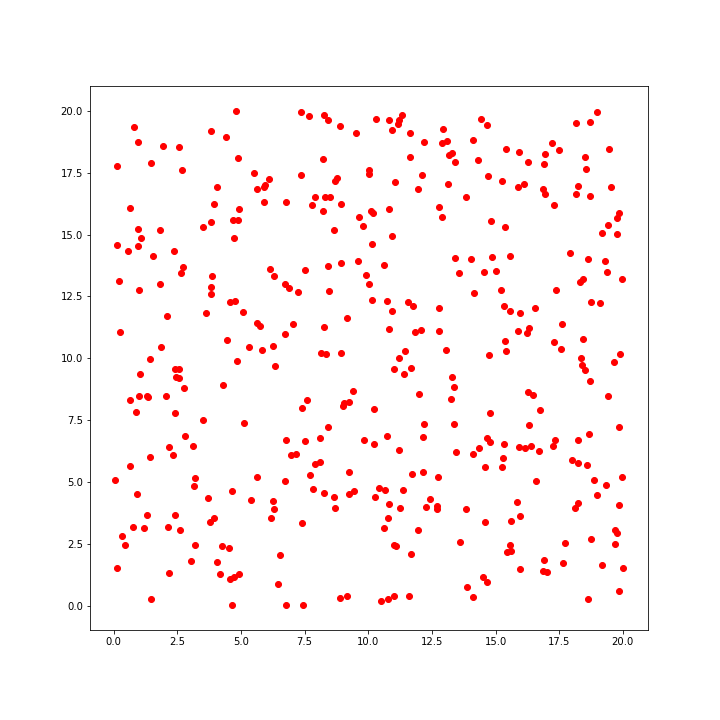

In [506]:
figure, ax = plt.subplots(figsize=(10,10))
axes = figure.axes
# plt.ion()
for point in input_points:
    plt.scatter(point[0], point[1], color = 'red')
plt.show()

### Laplace distribution

In [512]:
points, input_points = generate_points(N = 500, distrib = 'laplace')

<IPython.core.display.Javascript object>


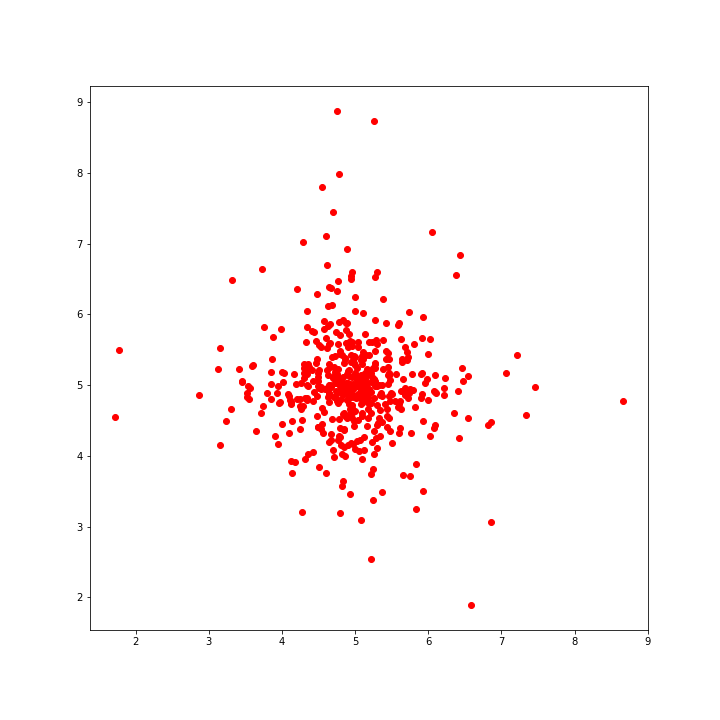

In [514]:
figure, ax = plt.subplots(figsize=(10,10))
axes = figure.axes
# plt.ion()
for point in input_points:
    plt.scatter(point[0], point[1], color = 'red')
plt.show()

### Cluster distribution

In [515]:
points, input_points = generate_points(N = 600, distrib = 'cluster')

<IPython.core.display.Javascript object>


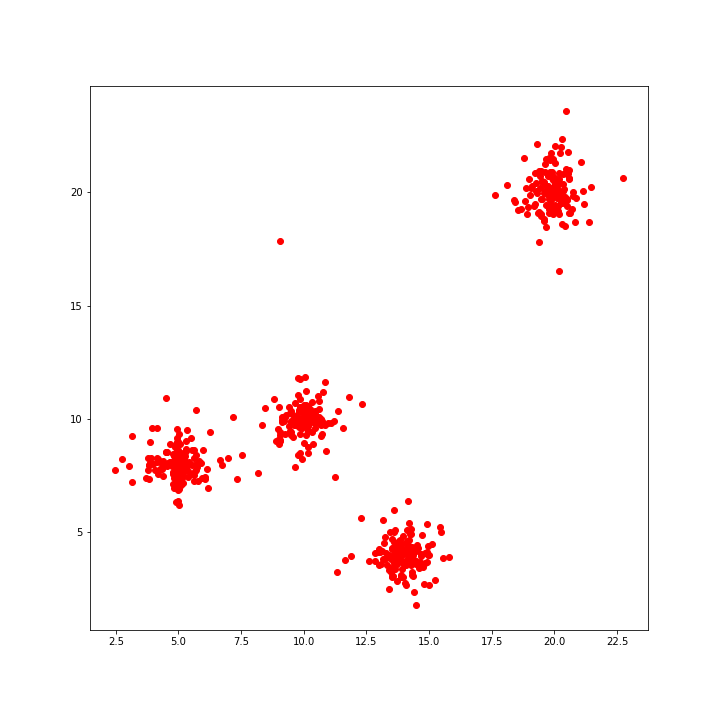

In [516]:
figure, ax = plt.subplots(figsize=(10,10))
axes = figure.axes
# plt.ion()
for point in input_points:
    plt.scatter(point[0], point[1], color = 'red')
plt.show()

# Jarvis’s Algorithm or Gift Wrapping

I used the following pseudocode from https://en.wikipedia.org/wiki/Gift_wrapping_algorithm

```
algorithm jarvis(S) is
    // S is the set of points
    // P will be the set of points which form the convex hull. Final set size is i.
    pointOnHull = leftmost point in S // which is guaranteed to be part of the CH(S)
    i := 0
    repeat
        P[i] := pointOnHull
        endpoint := S[0]      // initial endpoint for a candidate edge on the hull
        for j from 0 to |S| do
            // endpoint == pointOnHull is a rare case and can happen only when j == 1 and a better endpoint has not yet been set for the loop
            if (endpoint == pointOnHull) or (S[j] is on left of line from P[i] to endpoint) then
                endpoint := S[j]   // found greater left turn, update endpoint
        i := i + 1
        pointOnHull = endpoint
    until endpoint = P[0]      // wrapped around to first hull point
```

In [496]:


def find_leftmost_point_index(points):
    leftmost = 0
    for i in range(1,len(points)):
        if points[i].x < points[leftmost].x: 
            leftmost = i
        elif points[i].x == points[leftmost].x:
            if points[i].y > points[leftmost].y:
                leftmost = i
    return leftmost

def find_triplet_orientation(p, q, r):
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)

    if val == 0: return -1  # collinear
    elif val > 0: return 0 # clockwise
    else: return 1         # counterclockwise

def find_jarvis_hull(points):
    n = len(points)

    figure, ax = plt.subplots(figsize=(10,10))
    axes = figure.axes
    plt.ion()
    for point in input_points:
        plt.scatter(point[0], point[1], color = 'red')
    
    convex_points = []
    leftmost_point = find_leftmost_point_index(points)
    hull = []

    
    p = leftmost_point
    q = 0
    current = 0
    
    #This loop runs O(h) times where h is number of points in result
    while(True):
        hull.append(p)
        plot_color(plt, figure, points, p)
        
        if len(hull) > 1:
            x1, y1, x2, y2 = get_drawing_points(hull, current, current+1, points) 
            current +=1
            draw_line(x1, y1, x2, y2, figure, ax, color = 'green')
    
        q = (p + 1) % n
        for i in range(n):
#             plot_color(plt, figure, points, q, color = 'blue')
            
            x1, y1 = points[q].x, points[q].y
            x2, y2 = points[i].x, points[i].y
            
#             draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')
#             remove_line(axes, figure)
            
            if(find_triplet_orientation(points[p], points[i], points[q]) > 0):
                q = i
        
#         plot_color(plt, figure, points, q, color = 'red')    
        p = q

        if(p == leftmost_point): 
            x1, y1, x2, y2 = get_drawing_points(hull, 0, -1, points)
            draw_line(x1, y1, x2, y2, figure, ax, color = 'green')
            break

    for each in hull:
        convex_points.append([points[each].x, points[each].y])
        
    plt.show()
    return convex_points

In [2]:
def get_drawing_points(hull, first, second, points):
    first = hull[first]
    second = hull[second]
    x1, y1 = points[first].x, points[first].y
    x2, y2 = points[second].x, points[second].y
    
    return x1, y1, x2, y2

In [3]:
def plot_color(plt, figure, points, p, speed = 0.00000001, color = 'green'):
    plt.scatter(points[p].x, points[p].y, color = color)
        
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(speed)

In [201]:
def draw_line(x1, y1, x2, y2, figure, ax, color = 'green'):
    ax.plot([x1, x2], [y1, y2], color = color)
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.1)

In [218]:
def remove_line(axes, figure):
    axes[0].lines[-2].remove()
    figure.canvas.draw()
    figure.canvas.flush_events()
#     time.sleep(0.005)

<IPython.core.display.Javascript object>


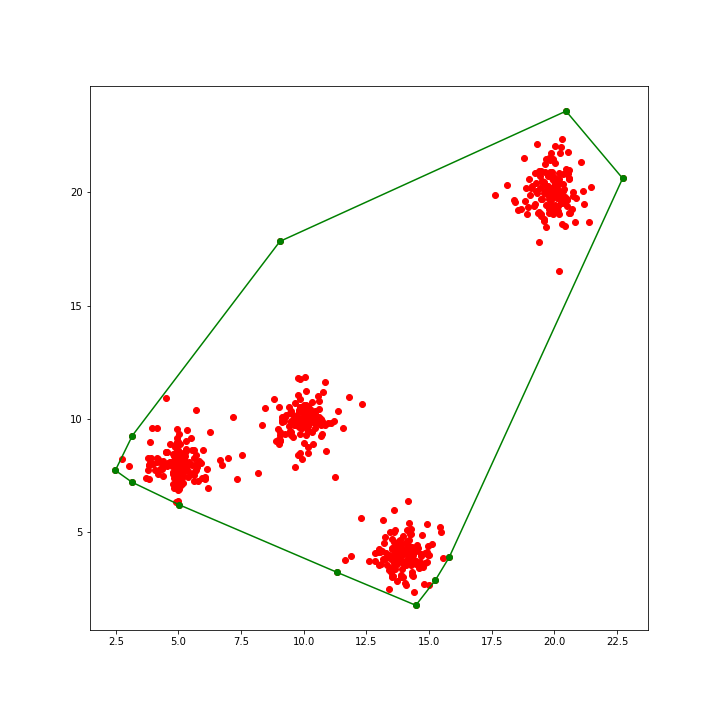

In [517]:
res = find_jarvis_hull(points)

<IPython.core.display.Javascript object>


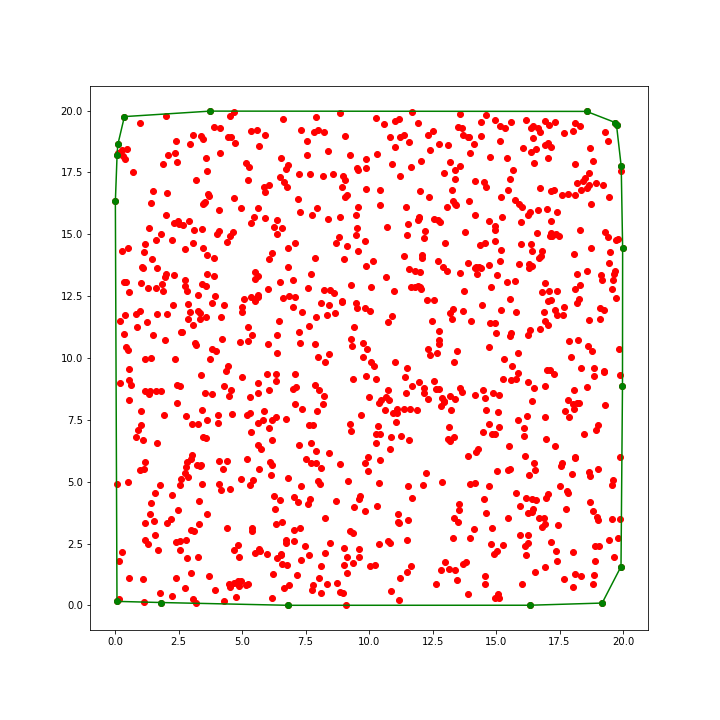

In [497]:
res = find_jarvis_hull(points)

# Graham Scan

I used the following presudocode from https://en.wikipedia.org/wiki/Graham_scan and https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%93%D1%80%D1%8D%D1%85%D0%B5%D0%BC%D0%B0

```
let points be the list of points
let stack = empty_stack()

find the lowest y-coordinate and leftmost point, called P0
sort points by polar angle with P0, if several points have the same polar angle then only keep the farthest

for point in points:
    # pop the last point from the stack if we turn clockwise to reach this point
    while count stack > 1 and ccw(next_to_top(stack), top(stack), point) <= 0:
        pop stack
    push point to stack
end
```

In [117]:
import math
def find_polar_angle(point):
    global p0
    atan = math.atan2(p0.y-point.y, p0.x-point.x)
    return (atan, point.y**2+point.x**2) if atan >= 0 else (2*math.pi + atan, point.x**2+point.y**2)

In [41]:
def find_lowest_point_index(points):
    lowest = 0
    for i in range(1,len(points)):
        if points[i].y < points[lowest].y: 
            lowest = i
        elif points[i].y == points[lowest].y:
            if points[i].x < points[lowest].x:
                lowest = i
    return lowest

In [42]:
def distance(point1, point2):
    x_d = (point1.x - point2.x)
    y_d = (point1.y - point2.y)
    
    return x_d**2 + y_d**2

In [118]:
#anchor point
p0 = points[find_lowest_point_index(points)]

In [44]:
def sort_by_polar_angle(points):
    return sorted(points, key=find_polar_angle)

In [520]:
def graham_scan(points):
    global p0
    
    figure, ax = plt.subplots(figsize=(10,10))
    axes = figure.axes
    plt.ion()
    for point in input_points:
        plt.scatter(point[0], point[1], color = 'red')
    
    
    sorted_by_angle = sort_by_polar_angle(points)
    
    convex = []
    convex.append(sorted_by_angle[0])
    convex.append(sorted_by_angle[1])
    
    plot_color(plt, figure, convex, 0, color = 'green')
    plot_color(plt, figure, convex, 1, color = 'green')
    
    x1, y1 = convex[0].x, convex[0].y
    x2, y2 = convex[1].x, convex[1].y
            
#     draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')   

    start = convex[1]
    end = convex[1]
    for i in range(2, len(sorted_by_angle)):
        end = sorted_by_angle[i]
        x1, y1 = convex[-1].x, convex[-1].y
        x2, y2 = sorted_by_angle[i].x, sorted_by_angle[i].y

#         draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')  
        
        while len(convex)!= 1 and find_triplet_orientation(convex[-2], convex[-1], sorted_by_angle[i]) < 1:
            poped = convex.pop()
            plot_color(plt, figure, [poped], 0, color = 'red')
#             remove_line(axes, figure)
            
     
        convex.append(sorted_by_angle[i])
        plot_color(plt, figure, sorted_by_angle, i)
        
    x1, y1 = convex[-1].x, convex[-1].y
    x2, y2 = convex[0].x, convex[0].y
    
#     print(x1, x2, y1, y2)

#     draw_line(x1, y1, x2, y2, figure, ax, color = 'blue')   
    
    plt.show()
    return convex

In [522]:
points, input_points = generate_points(N = 100, distrib = 'laplace')

<IPython.core.display.Javascript object>


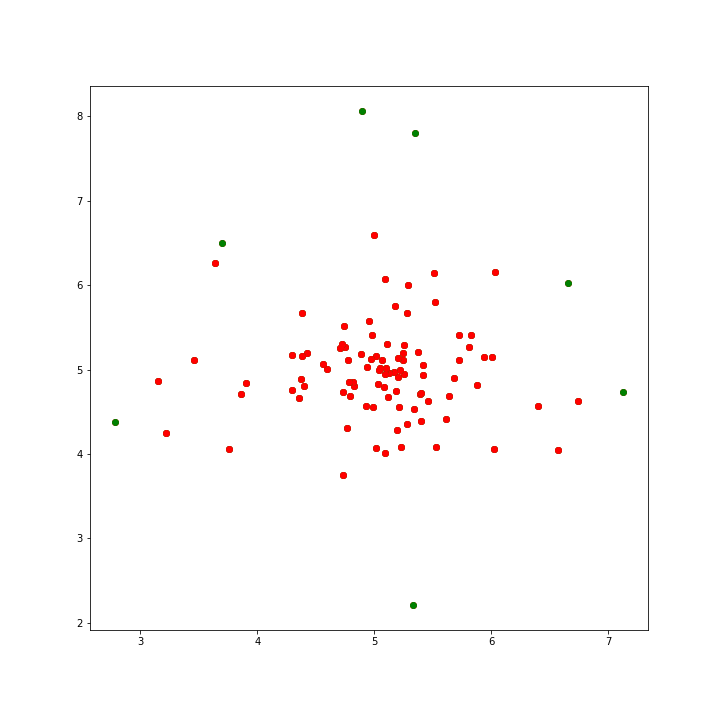

[2.78812044] [5.33375225] [4.38020406] [2.20517451]


In [523]:
gs = graham_scan(points)

In [524]:
p =  find_lowest_point_index(points)

In [526]:
sp = sort_by_polar_angle(points)

### Sorted points with respect to the lowest one

<IPython.core.display.Javascript object>


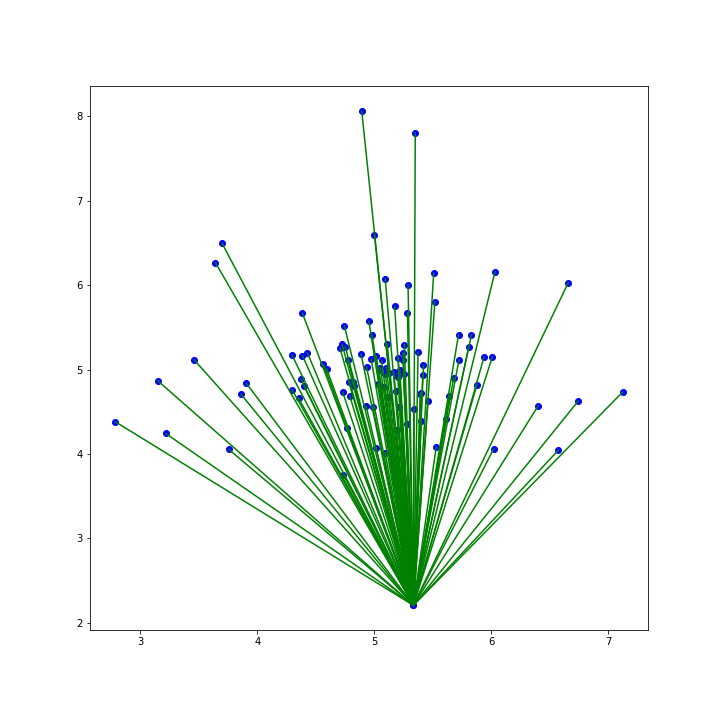

In [527]:
figure, ax = plt.subplots(figsize=(10,10))
axes = figure.axes

plt.scatter(points[p].x, points[p].y, color = "red")

x2, y2 = points[p].x, points[p].y
for point in sp:
    plt.scatter(point.x, point.y, color = "blue")

    
for point in sp:

    x1, y1 = point.x, point.y
    draw_line(x1, y1, x2, y2, figure, ax, color = 'green')    
    
    
plt.scatter(points[p].x, points[p].y, color = "red")
plt.show()

In [528]:
res = gs

<IPython.core.display.Javascript object>


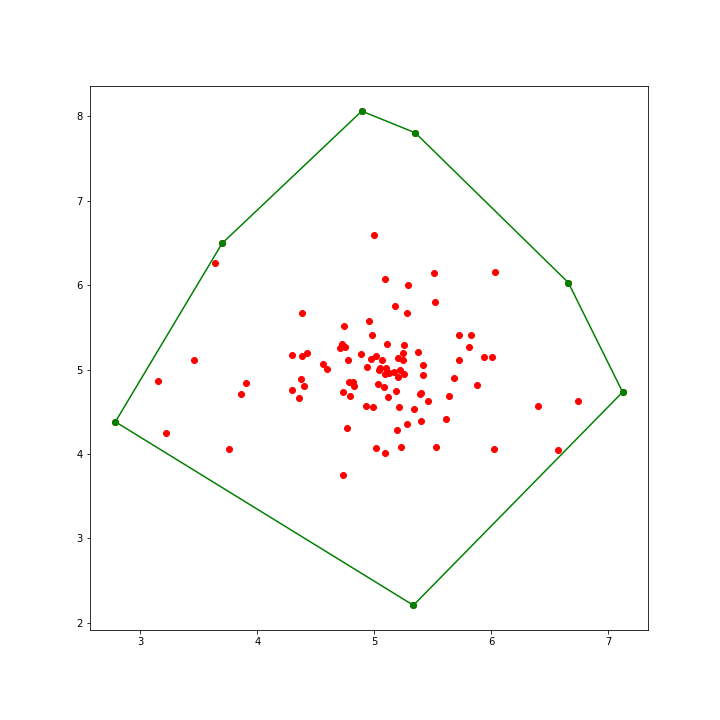

In [536]:
figure, ax = plt.subplots(figsize=(10,10))

axes = figure.axes
plt.ion()

for point in points:
    plt.scatter(point.x, point.y, color = 'red')
    
for point in res:
    plt.scatter(point.x, point.y, color = 'green')
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.00005)
    
for i in range(len(res)-1):
    x1, y1 = res[i].x, res[i].y
    x2, y2 = res[i+1].x, res[i+1].y
    
    draw_line(x1, y1, x2, y2, figure, ax)
    

x1, y1 = res[0].x, res[0].y
x2, y2 = res[-1].x, res[-1].y
draw_line(x1, y1, x2, y2, figure, ax)

# for i in range(len(res)-1):
#     remove_line(axes, figure)

# remove_line(axes, figure)
plt.show()

# Quickhull

I used the following pseudocode: https://en.wikipedia.org/wiki/Quickhull

```
Input = a set S of n points 
Assume that there are at least 2 points in the input set S of points

function QuickHull(S) is
    // Find convex hull from the set S of n points
    Convex Hull := {} 
    Find left and right most points, say A & B, and add A & B to convex hull 
    Segment AB divides the remaining (n − 2) points into 2 groups S1 and S2 
        where S1 are points in S that are on the right side of the oriented line from A to B, 
        and S2 are points in S that are on the right side of the oriented line from B to A 
    FindHull(S1, A, B) 
    FindHull(S2, B, A) 
    Output := Convex Hull
end function

function FindHull(Sk, P, Q) is
    // Find points on convex hull from the set Sk of points 
    // that are on the right side of the oriented line from P to Q
    if Sk has no point then
        return
    From the given set of points in Sk, find farthest point, say C, from segment PQ 
    Add point C to convex hull at the location between P and Q 
    Three points P, Q, and C partition the remaining points of Sk into 3 subsets: S0, S1, and S2 
        where S0 are points inside triangle PCQ, S1 are points on the right side of the oriented 
        line from P to C, and S2 are points on the right side of the oriented line from C to Q. 
    FindHull(S1, P, C) 
    FindHull(S2, C, Q) 
end function
             
```

In [142]:
def find_left_right_most_points(points):
    x_left = points[0].x
    x_right = points[-1].x
    
    point_left = points[0]
    point_right = points[-1]
    
    for point in points:
        if point.x < x_left:
            x_left = point_left.x
            point_left = point
            
        if point.x > x_right:
            x_right = point.x
            point_right= point

    return point_left, point_right

In [181]:
l, r = find_left_right_most_points(points)

In [182]:
l.x, l.y, r.x, r.y

(2, 18, 25, 11)

In [538]:
def maximum_distance_from_the_line(left, right, point):
    return abs((point.y - left.y) * (right.x - left.x) - (right.y - left.y) * (point.x - left.x))

In [539]:
def find_upper_hull(points, left, right, hull):
    
    c_point = None;
    max_dist = 0;
    
    for point in points:
        dist = maximum_distance_from_the_line(left, right, point)
        
        if dist > max_dist:
            c_point = point
            max_dist = dist
    
    left_points = []
    right_points = []
    
    if c_point == None:
        hull.add(left)
        hull.add(right)
    
    else:
        for point in points:
            orient = find_triplet_orientation(c_point, point, left)
            if orient > 0:
                left_points.append(point)

            orient = find_triplet_orientation(right, point, c_point)
            if orient > 0:
                right_points.append(point)
                
        find_upper_hull(left_points, left, c_point, hull)
        find_upper_hull(right_points, c_point, right, hull)

In [540]:
def find_upper_lower(points, left, right):
    
    upper_points = []
    lower_points = []
    
    for point in points:
        orient = find_triplet_orientation(right, point, left)
        if orient > 0:
            upper_points.append(point)
        if orient == 0:
            lower_points.append(point)
            
    return upper_points, lower_points

In [541]:
def quickhull(points):
    hull = set()
    
    left, right = find_left_right_most_points(points)
    
    hull.add(left)
    hull.add(right)
    
    upper_points, lower_points = find_upper_lower(points, left, right)
    


    find_upper_hull(upper, left, right, hull)
    
    find_upper_hull(lower, right, left, hull)
    
    return hull
            
    
    



In [543]:
h = quickhull(points)

<IPython.core.display.Javascript object>


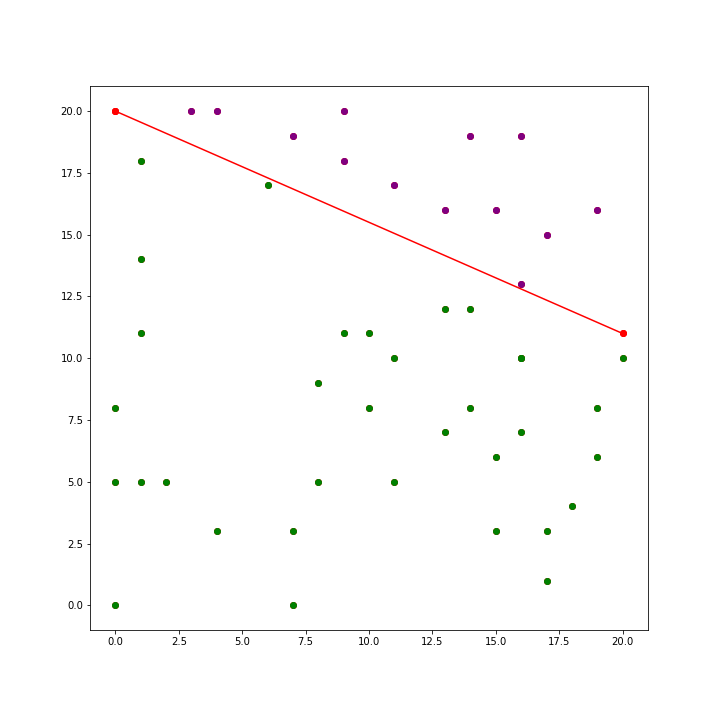

In [265]:
figure, ax = plt.subplots(figsize=(10,10))
axes = figure.axes

for point in input_points:
    plt.scatter(point[0], point[1], color = 'red')
    
x1, y1 = left.x, left.y,
x2, y2 = right.x, right.y

plt.scatter(x1, y1, color = 'red')
plt.scatter(x2, y2, color = 'red')

draw_line(x1, y1, x2, y2, figure, ax, color = 'red')  
    
for point in upper:
    plt.scatter(point.x, point.y, color = 'purple')
    
for point in lower:
    plt.scatter(point.x, point.y, color = 'green')
